## NYC Yellow Taxi Trip Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv("................/yellow_tripdata.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [4]:
df.nunique()

VendorID                       2
tpep_pickup_datetime     2438284
tpep_dropoff_datetime    2442163
passenger_count               10
trip_distance               4350
pickup_longitude           35900
pickup_latitude            62748
RateCodeID                     7
store_and_fwd_flag             2
dropoff_longitude          53297
dropoff_latitude           87523
payment_type                   5
fare_amount                 2053
extra                         55
mta_tax                        3
tip_amount                  3596
tolls_amount                 932
improvement_surcharge          2
total_amount               11969
dtype: int64

In [5]:
df["VendorID"] = df["VendorID"].astype("category")
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].astype("category")
df["payment_type"] = df["payment_type"].astype("category")

In [6]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    3
total_amount             0
dtype: int64

### Data Cleaning

In [7]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
# Dropping missing values
df = df.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'fare_amount', 'trip_distance'])

In [9]:
# Step 2: Remove invalid entries
df = df[df['trip_distance'] > 0] 
df = df[df['fare_amount'] > 0]  
df = df[df['passenger_count'] > 0]  

In [10]:
# Handlinng extreme fare
fare_cap = df['fare_amount'].quantile(0.99)
df = df[df['fare_amount'] <= fare_cap]

In [11]:
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12605257 entries, 0 to 12748985
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   pickup_longitude       float64       
 6   pickup_latitude        float64       
 7   RateCodeID             int64         
 8   store_and_fwd_flag     category      
 9   dropoff_longitude      float64       
 10  dropoff_latitude       float64       
 11  payment_type           category      
 12  fare_amount            float64       
 13  extra                  float64       
 14  mta_tax                float64       
 15  tip_amount             float64       
 16  tolls_amount           float64       
 17  improvement_surcharge  float64       
 18  total_amount        

In [12]:
df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.260526e+07,1.260526e+07,1.260526e+07,1.260526e+07,1.260526e+07,1.260526e+07,1.260526e+07,1.260526e+07,1.260526e+07,1.260526e+07,1.260526e+07,1.260526e+07,1.260525e+07,1.260526e+07
mean,1.684289e+00,1.353052e+01,-7.264951e+01,4.002110e+01,1.022049e+00,-7.276929e+01,4.008810e+01,1.162304e+01,3.093618e-01,4.997082e-01,1.824922e+00,2.172683e-01,2.832409e-01,1.477380e+01
std,1.339656e+00,9.900058e+03,9.813131e+00,5.406882e+00,4.905870e-01,9.374193e+00,5.161541e+00,8.840032e+00,4.760805e-01,1.207585e-02,1.112722e+03,1.320537e+00,6.889740e-02,1.112776e+03
min,1.000000e+00,1.000000e-02,-1.193147e+02,0.000000e+00,1.000000e+00,-7.401667e+02,-9.029157e+00,1.000000e-02,-7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.970000e+01
25%,1.000000e+00,1.000000e+00,-7.399171e+01,4.073584e+01,1.000000e+00,-7.399117e+01,4.073475e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,1.000000e+00,1.680000e+00,-7.398166e+01,4.075327e+01,1.000000e+00,-7.397980e+01,4.075382e+01,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.115000e+01
75%,2.000000e+00,3.000000e+00,-7.396685e+01,4.076765e+01,1.000000e+00,-7.396274e+01,4.076890e+01,1.350000e+01,5.000000e-01,5.000000e-01,2.060000e+00,0.000000e+00,3.000000e-01,1.630000e+01
max,9.000000e+00,1.542000e+07,7.866265e+01,4.047000e+02,9.900000e+01,8.527402e+01,4.595333e+02,5.200000e+01,6.480200e+02,5.000000e-01,3.950589e+06,1.450090e+03,3.000000e-01,3.950612e+06


### Descriptive Analysis

In [13]:
# Avcerage fare amount for different distance
# Create distance bins
bins = [0, 1, 5, 10, 20, 50]
labels = ['0-1 mile', '1-5 miles', '5-10 miles', '10-20 miles', '20-50 miles']
df['Distance_Range'] = pd.cut(df['trip_distance'], bins=bins, labels=labels)

In [14]:
# Calculate average fare by distance range
avg_fare_by_distance = df.groupby('Distance_Range')['fare_amount'].mean()
print("Average Fare Amount for Different Distance Ranges:")
print(avg_fare_by_distance)


Average Fare Amount for Different Distance Ranges:
Distance_Range
0-1 mile        5.417307
1-5 miles      10.525901
5-10 miles     23.664630
10-20 miles    42.140397
20-50 miles    51.597396
Name: fare_amount, dtype: float64


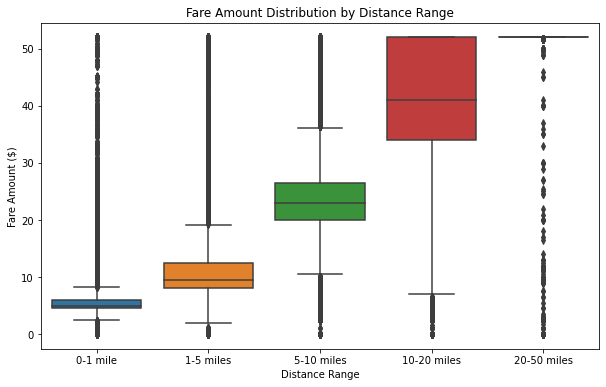

In [15]:
# Distribution of Fare Amounts by Distance

# Boxplot of fare amount by distance range
plt.figure(figsize=(10, 6))
sns.boxplot(x='Distance_Range', y='fare_amount', data=df)
plt.title('Fare Amount Distribution by Distance Range')
plt.ylabel('Fare Amount ($)')
plt.xlabel('Distance Range')
plt.show()

In [16]:
#Busiest Pickup and Drop-off Times
# Extract hour from pickup and drop-off times
df['Pickup_Hour'] = df['tpep_pickup_datetime'].dt.hour
df['Dropoff_Hour'] = df['tpep_dropoff_datetime'].dt.hour

# Find the busiest pickup and drop-off hours
busiest_pickup_hours = df['Pickup_Hour'].value_counts().head(5)
busiest_dropoff_hours = df['Dropoff_Hour'].value_counts().head(5)


In [17]:
print("Busiest Pickup Hours:")
print(busiest_pickup_hours)

Busiest Pickup Hours:
19    798544
18    792577
20    727575
21    704950
22    680073
Name: Pickup_Hour, dtype: int64


In [18]:
print("Busiest Drop-off Hours:")
print(busiest_dropoff_hours)

Busiest Drop-off Hours:
19    814875
18    779649
20    743260
21    704415
22    686870
Name: Dropoff_Hour, dtype: int64


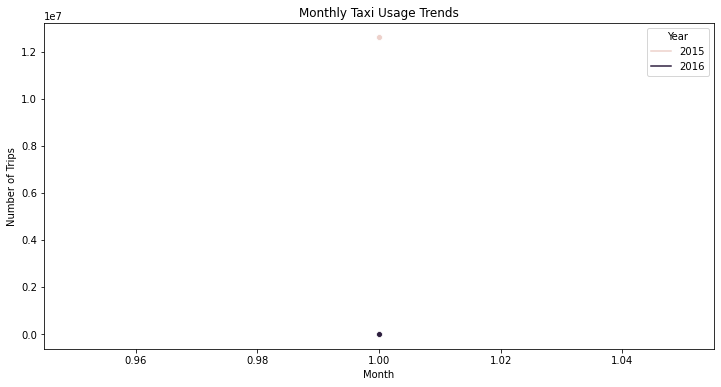

In [19]:
# Seasonal Trends in Taxi Usage
# Extract month and year
df['Month'] = df['tpep_pickup_datetime'].dt.month
df['Year'] = df['tpep_dropoff_datetime'].dt.year

# Group by year and month
monthly_trips = df.groupby(['Year', 'Month']).size().reset_index(name='Trip_Count')

# Plot monthly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trips, x='Month', y='Trip_Count', hue='Year', marker='o')
plt.title('Monthly Taxi Usage Trends')
plt.ylabel('Number of Trips')
plt.xlabel('Month')
plt.show()


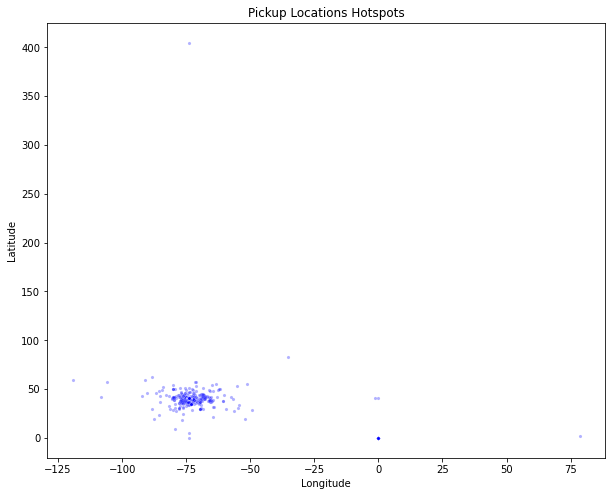

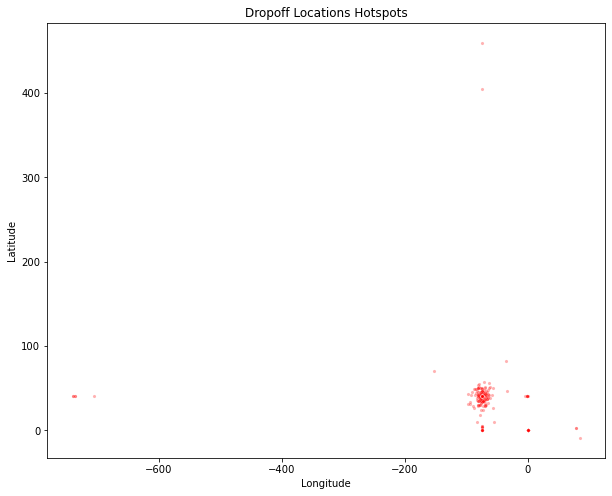

In [48]:
# Pickup vs. Dropoff Location Hotspots

# Pickup hotspots
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, alpha=0.3, s=10, color='blue')
plt.title('Pickup Locations Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Dropoff hotspots
plt.figure(figsize=(10, 8))
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, alpha=0.3, s=10, color='red')
plt.title('Dropoff Locations Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Revenue Insights

In [20]:
# Total Revenue by Taxi Company
# Calculate total revenue by VendorID
revenue_by_vendor = df.groupby('VendorID')['fare_amount'].sum()
print("Total Revenue by Taxi Company (Vendor):")
print(revenue_by_vendor)

Total Revenue by Taxi Company (Vendor):
VendorID
1    69418243.01
2    77093137.52
Name: fare_amount, dtype: float64


In [21]:
# Average Tip Percentage by Payment Type
# Calculate tip percentage and group by Payment_Type
df['Tip_Percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
avg_tip_by_payment = df.groupby('payment_type')['Tip_Percentage'].mean()
print("Average Tip Percentage by Payment Type:")
print(avg_tip_by_payment)

Average Tip Percentage by Payment Type:
payment_type
1    23.944451
2     0.000837
3     0.025679
4     0.027798
5     0.000000
Name: Tip_Percentage, dtype: float64


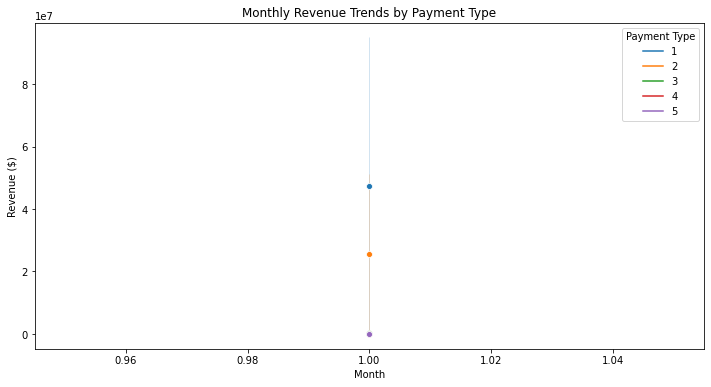

In [22]:
# Revenue Trends by Payment Type
# Group revenue by payment type over months
revenue_trends = df.groupby(['payment_type', 'Year', 'Month'])['fare_amount'].sum().reset_index()

# Plot revenue trends by payment type
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_trends, x='Month', y='fare_amount', hue='payment_type', marker='o')
plt.title('Monthly Revenue Trends by Payment Type')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.legend(title='Payment Type')
plt.show()

In [23]:
# Average fare and tip percentage by vendor
vendor_metrics = df.groupby('VendorID').agg({
    'fare_amount': 'mean',
    'tip_amount': 'mean'
}).rename(columns={'fare_amount': 'Avg_Fare', 'tip_amount': 'Avg_Tip'})

print("Vendor-Specific Metrics (Average Fare and Tip):")
print(vendor_metrics)


Vendor-Specific Metrics (Average Fare and Tip):
           Avg_Fare   Avg_Tip
VendorID                     
1         11.534855  1.522924
2         11.703604  2.100834


In [24]:
# Revenue contribution by payment type
payment_revenue = df.groupby('payment_type')['fare_amount'].sum()
payment_revenue_percentage = (payment_revenue / payment_revenue.sum()) * 100

print("Payment Type Revenue Percentage:")
print(payment_revenue_percentage)


Payment Type Revenue Percentage:
payment_type
1    64.786668
2    34.917543
3     0.222157
4     0.073627
5     0.000004
Name: fare_amount, dtype: float64


In [25]:
# Filter for high tip rides
high_tip_rides = df[df['tip_amount'] / df['fare_amount'] > 0.2]
print(f"Number of high-tip rides: {len(high_tip_rides)}")


Number of high-tip rides: 4854244


### Time-Based Insights

In [26]:
# Peak hours based on pickup time
peak_hours = df['Pickup_Hour'].value_counts().head(5)
print("Top 5 Peak Hours for Taxi Usage:")
print(peak_hours)


Top 5 Peak Hours for Taxi Usage:
19    798544
18    792577
20    727575
21    704950
22    680073
Name: Pickup_Hour, dtype: int64


In [27]:
# Extract day of the week
df['Day_Of_Week'] = df['tpep_pickup_datetime'].dt.day_name()

# Calculate revenue by day of the week
revenue_by_day = df.groupby('Day_Of_Week')['fare_amount'].sum()
highest_revenue_day = revenue_by_day.idxmax()
print(f"The Day with the Highest Revenue is: {highest_revenue_day}")


The Day with the Highest Revenue is: Saturday


In [28]:
# Heatmap of Taxi Usage by Hour and Day
# Group trips by day of the week and hour
hourly_trips = df.groupby(['Day_Of_Week', 'Pickup_Hour']).size().unstack()


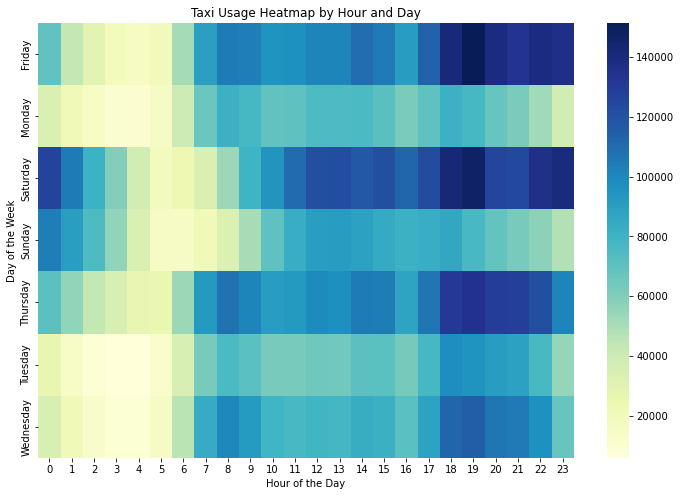

In [29]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_trips, cmap="YlGnBu", annot=False)
plt.title('Taxi Usage Heatmap by Hour and Day')
plt.ylabel('Day of the Week')
plt.xlabel('Hour of the Day')
plt.show()


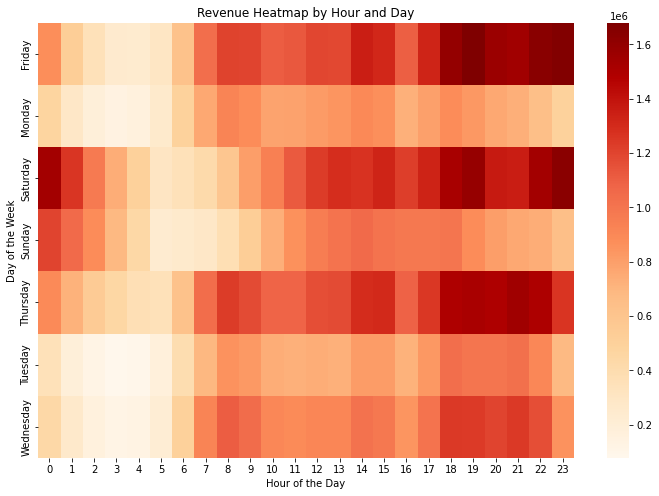

In [30]:
# Group revenue by day of the week and hour
hourly_revenue = df.groupby(['Day_Of_Week', 'Pickup_Hour'])['fare_amount'].sum().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_revenue, cmap="OrRd", annot=False)
plt.title('Revenue Heatmap by Hour and Day')
plt.ylabel('Day of the Week')
plt.xlabel('Hour of the Day')
plt.show()


In [31]:
# Trip count by season

# Assign season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# Group by season
seasonal_usage = df.groupby('Season').size()

print("Seasonal Trip Counts:")
print(seasonal_usage)


Seasonal Trip Counts:
Season
Winter    12605257
dtype: int64


In [32]:
# Weekend vs. Weekday Revenue
# Classify day as weekend or weekday
df['Is_Weekend'] = df['Day_Of_Week'].isin(['Saturday', 'Sunday'])

# Group by weekend and weekday
weekend_revenue = df.groupby('Is_Weekend')['fare_amount'].sum()

print("Weekend vs. Weekday Revenue:")
print(weekend_revenue)

Weekend vs. Weekday Revenue:
Is_Weekend
False    1.019268e+08
True     4.458459e+07
Name: fare_amount, dtype: float64


### Trip Efficiency

In [33]:
# Trips with High Fare per Mile

df['Fare_Per_Mile'] = df['fare_amount'] / df['trip_distance']
high_fare_trips = df[df['Fare_Per_Mile'] > 10]
print(f"Number of High Fare Trips (Fare/Mile > $10): {len(high_fare_trips)}")


Number of High Fare Trips (Fare/Mile > $10): 455532


In [34]:
# Passenger Count vs. Trip Distance

avg_distance_by_passenger = df.groupby('passenger_count')['trip_distance'].mean()
print("Average Trip Distance by Passenger Count:")
print(avg_distance_by_passenger)


Average Trip Distance by Passenger Count:
passenger_count
1    14.921506
2    18.125979
3     2.788094
4     2.797705
5     2.804485
6     2.740291
7     3.300000
8     2.200000
9    12.400000
Name: trip_distance, dtype: float64


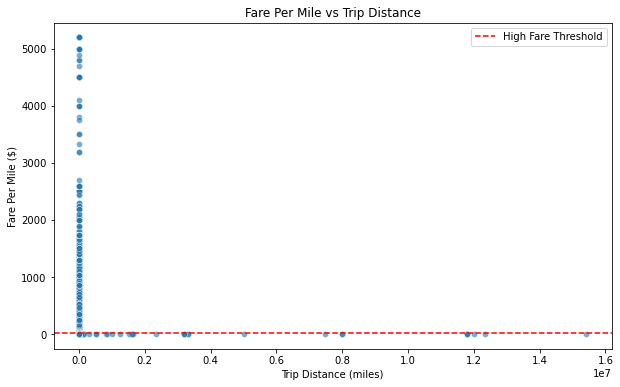

In [35]:
# Relationship Between Fare per Mile and Distance

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='Fare_Per_Mile', data=df, alpha=0.6)
plt.title('Fare Per Mile vs Trip Distance')
plt.ylabel('Fare Per Mile ($)')
plt.xlabel('Trip Distance (miles)')
plt.axhline(y=10, color='r', linestyle='--', label='High Fare Threshold')
plt.legend()
plt.show()


In [36]:
# Shared Rides Analysis

df['Trip_Duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes
avg_duration_by_passenger = df.groupby('passenger_count')['Trip_Duration'].mean()

print("Average Trip Duration by Passenger Count (minutes):")
print(avg_duration_by_passenger)


Average Trip Duration by Passenger Count (minutes):
passenger_count
1    14.206754
2    13.745579
3    13.928777
4    13.640027
5    14.421511
6    13.960817
7    11.316667
8    11.108333
9    25.533333
Name: Trip_Duration, dtype: float64


In [37]:
# Longest trip by distance
longest_trip = df.loc[df['trip_distance'].idxmax()]
print("Longest Trip Details:")
print(longest_trip)


Longest Trip Details:
VendorID                                   1
tpep_pickup_datetime     2015-01-11 21:55:11
tpep_dropoff_datetime    2015-01-11 22:24:16
passenger_count                            1
trip_distance                     15420004.5
pickup_longitude                  -73.992233
pickup_latitude                    40.729248
RateCodeID                                 1
store_and_fwd_flag                         N
dropoff_longitude                 -74.028084
dropoff_latitude                   40.622639
payment_type                               2
fare_amount                             34.5
extra                                    0.5
mta_tax                                  0.5
tip_amount                               0.0
tolls_amount                             0.0
improvement_surcharge                    0.3
total_amount                            35.8
Distance_Range                           NaN
Pickup_Hour                               21
Dropoff_Hour                     

In [38]:
# Shortest trip by duration
shortest_trip = df.loc[df['Trip_Duration'].idxmin()]
print("Shortest Trip Details:")
print(shortest_trip)

Shortest Trip Details:
VendorID                                   1
tpep_pickup_datetime     2015-01-21 15:15:05
tpep_dropoff_datetime    2015-01-20 19:04:04
passenger_count                            1
trip_distance                            4.6
pickup_longitude                   -74.00061
pickup_latitude                    40.757637
RateCodeID                                 1
store_and_fwd_flag                         N
dropoff_longitude                 -73.945702
dropoff_latitude                   40.775547
payment_type                               1
fare_amount                             23.0
extra                                    1.0
mta_tax                                  0.5
tip_amount                               2.2
tolls_amount                             0.0
improvement_surcharge                    0.3
total_amount                            27.0
Distance_Range                     1-5 miles
Pickup_Hour                               15
Dropoff_Hour                    

In [39]:
# Average fare per mile by vendor
vendor_efficiency = df.groupby('VendorID')['Fare_Per_Mile'].mean()

print("Vendor Efficiency (Average Fare Per Mile):")
print(vendor_efficiency)


Vendor Efficiency (Average Fare Per Mile):
VendorID
1    5.827716
2    6.389889
Name: Fare_Per_Mile, dtype: float64


### Advanced Analysis

In [40]:
# Detecting Fare Anomalies

# Calculate IQR for Fare_Amount
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define anomaly thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find anomalies
anomalies = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]
print(f"Number of Fare Anomalies: {len(anomalies)}")


Number of Fare Anomalies: 976190


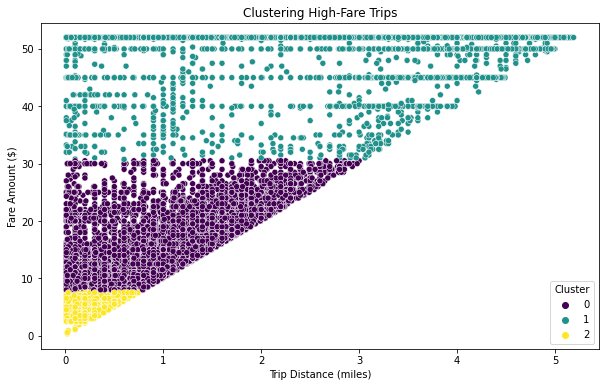

In [41]:
# Clustering High-Fare Trips

from sklearn.cluster import KMeans

# Select relevant features for clustering
cluster_data = df[df['Fare_Per_Mile'] > 10][['trip_distance', 'fare_amount']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data)

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_data, x='trip_distance', y='fare_amount', hue='Cluster', palette='viridis')
plt.title('Clustering High-Fare Trips')
plt.ylabel('Fare Amount ($)')
plt.xlabel('Trip Distance (miles)')
plt.show()


In [42]:
# Predicting Trip Duration (Regression Model)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data
X = df[['trip_distance', 'Pickup_Hour']]
y = df['Trip_Duration']
X = pd.get_dummies(X, columns=['Pickup_Hour'], drop_first=True)  # One-hot encode hour

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Regression Model RMSE: {rmse}")


Regression Model RMSE: 456.8581320550131


In [43]:
# Anomaly Detection Using Z-Scores

from scipy.stats import zscore

# Calculate Z-scores for fare amounts
df['Fare_Z_Score'] = zscore(df['fare_amount'])

# Filter anomalies
fare_anomalies = df[df['Fare_Z_Score'].abs() > 3]
print(f"Number of fare anomalies detected: {len(fare_anomalies)}")


Number of fare anomalies detected: 338702


In [44]:
# Feature Engineering for Trip Duration Prediction

# Add time of day category
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['Time_Of_Day'] = df['Pickup_Hour'].apply(time_of_day)

# Calculate average trip speed
df['Trip_Speed'] = df['trip_distance'] / (df['Trip_Duration'] / 60)  # in miles per hour


In [45]:
df['Trip_Speed']

0            5.285319
1            9.983193
2           10.746269
3           16.071429
4            9.318378
              ...    
12748981    15.254237
12748982     8.421053
12748983    15.357591
12748984     5.092492
12748985     7.241379
Name: Trip_Speed, Length: 12605257, dtype: float64

In [46]:
# Fare Prediction Using Decision Trees

from sklearn.tree import DecisionTreeRegressor

# Prepare data
X = df[['trip_distance', 'Pickup_Hour', 'passenger_count']]
y = df['fare_amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate model
y_pred = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Decision Tree RMSE: {dt_rmse}")


Decision Tree RMSE: 2.1571491482607907
